# Семинар 10
# Градиентный спуск/поток. Наискорейший спуск. Сходимость в выпуклом случае

**Вопрос**: Опишите возможности оракула. Что принимает оракул на вход, а что может дать на выход?

Рассмотрим классическую задачу минимизации функции:

$$\min_{x \in \mathbb{R}^n} f(x)$$

Тогда метод градиентного спуска выглядит следующим образом:

$$x_{k+1} = x_{k} - \eta_{k} \nabla f(x_k)$$

## Интуиция GD

### Направление локального наискорейшего спуска


Рассмотрим линейную аппроксимацию дифференцируемой функции $f$ по некоторому направлению $h$, $\| h \|_2 = 1$ с неотрицательным размером шага $\eta$:

$$f(x + \eta h) = f(x) + \eta \langle f'(x), h \rangle + o(\eta)$$

Мы хотим, чтобы $h$ было убывающим направлением:

$$f(x+ \eta h) \leq f(x)$$
$$f(x) + \eta \langle f'(x), h \rangle + o(\eta) \leq f(x) $$

и переходя к пределу с $\eta \rightarrow 0$:

$$ \langle f'(x), h \rangle \leq 0 $$

Также из неравенства Коши–Буняковского–Шварца:

$$ | \langle f'(x), h \rangle | \leq \| f'(x) \|_2 \| h \|_2 \;\;\; \rightarrow  \;\;\; \langle f'(x), h \rangle \geq - \| f'(x) \|_2 \| h \|_2 = - \| f'(x) \|_2$$

Таким образом, направление антиградиента

$$ h = - \frac{f'(x)}{\| f'(x) \|_2} $$

дает направление наибольшего локального убывания функции.

Результатом этого метода является 

$$x_{k+1} = x_{k} - \eta \nabla f(x_k)$$





### Схема Эйлера решения ОДУ

Рассмотрим обыкновенное диференциальное уравнение вида, которое называется уравнением градиентного потока:

$$\frac{dx}{dt} = -f'(x(t))$$

и дискретизуем его на равномерной сетке с шагом $\eta$

$$\frac{x_{k+1} - x_k}{\eta} = -f'(x(t)),$$

где $x_{k}:= x(t_k)$ и $\eta = t_{k+1} - t_k$ - шаг сетки.

Отсюда получаем выражение для $x_{k+1}$

$$x_{k+1} = x_{k} - \eta \nabla f(x_k)$$

которое в точности совпадает с выражением для градиентного спуска.

Такая схема называется явной или прямой схемой Эйлера.


### Необходимое условие локального минимума

$$ f'(x) = 0 $$

$$- \eta f'(x) = 0$$

$$x - \eta f'(x) = x$$

$$x_{k} - \eta f'(x) = x_{k+1}$$

Данное выражение не является доказательством, а является каким-то интуитивным объяснением.


## Стратегии выбора размера шага

In [ ]:
pip install git+https://github.com/amkatrutsa/liboptpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/amkatrutsa/liboptpy to /tmp/pip-req-build-zgsert50
  Running command git clone -q https://github.com/amkatrutsa/liboptpy /tmp/pip-req-build-zgsert50


In [ ]:

%matplotlib inline

import matplotlib.pyplot as plt
import ipywidgets as ipywidg
import numpy as np
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss

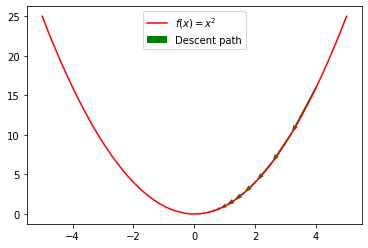

In [ ]:
f = lambda x: np.power(x, 2)
gradf = lambda x: 2 * x

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

def update(x0, step):
    gd = methods.fo.GradientDescent(f, gradf, ss.ConstantStepSize(step))
    _ = gd.solve(np.array([x0]), max_iter=10)
    x_hist = gd.get_convergence()
    x = np.linspace(-5, 5)
    ax.clear()
    ax.plot(x, f(x), color="r", label="$f(x) = x^2$")
    y_hist = np.array([f(x) for x in x_hist])
    x_hist = np.array(x_hist)
    plt.quiver(x_hist[:-1], y_hist[:-1], x_hist[1:]-x_hist[:-1], y_hist[1:]-y_hist[:-1], 
               scale_units='xy', angles='xy', scale=1, width=0.005, color="green", label="Descent path")
    ax.legend()
    fig.canvas.draw()

step_slider = 0.1#@param {type:"slider", min:0, max:2.0, step:0.1}
x0_slider =  4#@param {type:"slider", min:-4, max:4, step:0.1}
update(x0_slider, step_slider)

**Пример** Найдите параметр $\eta$, при котором алгоритм GD будет расходиться, зная, что функция $f(x) = x^2$. 

### Постоянный шаг

Для $f \in C^{1,1}_{L}:$

$$\eta_k = \eta $$

$$f(x_{k}) - f(x_{k+1}) \geq \eta \left( 1 - \frac{1}{2} L \eta \right) \| \nabla f(x_{k}) \|_2^2 $$

С выбором $\eta = \frac{1}{L},$ мы имеем: 

$$f(x_{k}) - f(x_{k+1}) \geq  \frac{1}{2L}  \| \nabla f(x_{k}) \|_2^2 $$

### Фиксированная последовательность

$$\eta_{k} = \frac{1}{\sqrt{k+1}}$$

Последние 2 стратегии являются наиболее простыми с точки зрения реализации и аналитического анализа. Понятно, что на практике такой подход часто работает не очень хорошо (геометрия функции заранее не известна).

### Метод наискорейшего спуска

$$\eta_{k} = \arg \min_{\eta \in \mathbb{R}_+} f(x_{k+1}) = \arg \min_{\eta \in \mathbb{R}_+} f(x_{k} - \eta \nabla f(x_{k}))$$

Больше теоретический, чем практический подход. Это также позволяет анализировать сходимость, но часто точный line search может быть затруднен, если вычисление функции занимает слишком много времени или стоит дорого.

Интересным теоретическим свойством этого метода является то, что каждая следующая итерация ортогональна предыдущей:

$$\nabla f(x_{k+1})^T \nabla f(x_{k}) = 0$$


**Пример**: найти параметр $\eta$ для квадратичных функций $f(x) = \frac{1}{2} x^T A x - b^T x + c$, где $A \in \mathbb{S}_{++}$.

## Анализ сходимости

### Липишица непрерывный градиент

Предположим, что $f: \mathbb{R}^n \rightarrow \mathbb{R}$ является выпуклой и дифференцируемой функцией и дополнительно

$$\| \nabla f(x) - \nabla f(y) \| \leq L \| x - y \|,$$ для $\forall x,y \in \mathbb{R^n}$, т.е. $\nabla f$ является Липшицивой непрерывной функцией с константой $L > 0$.

Поскольку $\nabla f $ Липшицева с константой $L$, что означает $\nabla^2 f - LI \preceq 0$, имеем $\forall x,y,z$:

$$(x-y)^T (\nabla^2 f(z) - LI) (x-y) \leq 0$$

$$(x-y)^T \nabla^2 f(z) (x-y) \leq L\| x-y \|^2$$

Теперь рассмотрим аппроксимацию Тейлора второго порядка для $f(y)$ и теорему Тейлора об остатках (предполагаем, что функция $f$ непрерывно дифференцируема), имеем $\forall x,y, \exists z \in [x,y]:$

$$f(y) = f(x) + \nabla f(x)^T (y-x) + \frac{1}{2} (x-y)^T \nabla^2 f(z) (x-y) \leq f(x) + \nabla f(x)^T (y-x) + \frac{L}{2}\| x-y \|^2. $$

Тогда для градиентного спуска имеем $x = x_k, y = x_{k+1}, x_{k+1} = x_{k} - \eta_{k} \nabla f(x_{k})$:

$$ f(x_{k+1}) \leq f(x_{k}) + \nabla f(x_{k}) ^T (\eta_{k} \nabla f(x_{k})) + \frac{L}{2}\| \eta_{k} \nabla f(x_{k}) \|^2 \Rightarrow  $$

$$ \Rightarrow f(x_{k+1}) \leq f(x_{k}) - \eta \left( 1 - \frac{1}{2} L \eta \right) \| \nabla f(x_{k}) \|_2^2 $$



### Оптимальная константа размера шага

Теперь, если мы рассмотрим стратегию постоянного шага и максимизируем $\left( 1 - \frac{1}{2} L \eta \right) \eta \rightarrow \max_{\eta}$, то получим $\eta = \frac{1}{L}$.

$$f(x_{k+1}) \leq f(x_k) - \frac{1}{2L} \| \nabla f(x_k) \|^2$$

### Выпуклость

$$f(x_{k}) \leq f(x^*) + \nabla f(x_{k})^T (x_{k} - x^*)$$

Применяя это, получим

\begin{equation*}
\begin{split}
   f(x_{k+1}) & \leq  f(x^*) + \nabla f(x_{k})^T (x_{k} - x^*) - \frac{1}{2L} \| \nabla f(x_k) \|^2 = \\
   & = f(x^*) + \frac{L}{2} \left( \| x_k - x^* \|^2 - \| x_k - x^* - \frac{1}{L} \nabla f(x_k) \|^2 \right)= \\
   & = f(x^*) + \frac{L}{2} \left( \| x_k - x^* \|^2 - \| x_{k+1} - x^* \|^2 \right)
\end{split}
\end{equation*}

Таким образом, суммируя по всем итерациям, имеем:

\begin{equation*}
\begin{split}
   \sum_{i = 1}^{k} (f(x_i) - f(x^*)) & \leq \frac{L}{2} \left( \| x_0 - x^* \|^2 - \| x_{k} - x^* \|^2 \right) \\
    & \leq \frac{L}{2} \left( \| x_0 - x^* \|^2 \right) = \frac{LR^2}{2},
\end{split}
\end{equation*}

где $R = \| x_0 - x^* \|$. И из-за монотонности:

$$ f(x_k) - f(x^*) \leq \sum_{i = 1}^{k} (f(x_i) - f(x^*)) \leq \frac{L}{2} \left( \| x_0 - x^* \|^2 \right) = \frac{LR^2}{2k} = \frac{R^2}{2\eta k}$$




## Домашнее задание

$\boxed{\textbf{deadline}\text{: 23:59 (Московское время), 17 ноября}}$



1.   Решите задачу линейного программирования табличной реализацией Симплекс-метода и сделайте проверку (через любой solver):
\begin{equation}
  \begin{split}
    & \max_x c^{\top}x \\
    \text{s.t. } & Ax \leq b\\
    & x_i \geq 0,
  \end{split}
\end{equation}

где
\begin{equation}
A = \begin{pmatrix}
    2 & 3 & 6\\
    4 & 2 & 4\\
    4 & 6 & 8
\end{pmatrix}, \;\;\;
b = \begin{pmatrix} 240 \\ 200 \\ 160 \end{pmatrix}, \;\;\;
c = \begin{pmatrix} 4 \\ 5 \\ 4 \end{pmatrix}
\end{equation}

2.   Решите ЗЛП табличной реализацией М-метода (Двухфазный Симплекс-метод) и сделайте проверку (через любой solver):
\begin{equation}
  \begin{split}
    & \min x_1 + x_2 + x_3 - x_4\\
    \text{s.t. } & x_1 + 2x_2+ 3x_3 = 3\\
    & -x_1 + 2x_2 + 6x_3 = 2\\
    & 4x_2 + 9x_3 = 5\\
    & 3x_3 + x_4 = 2\\
    & x_{1,2,3,4} \geq 0
  \end{split}
\end{equation}

3.   Используя Ratio test, покажите, что последовательность $r_k = \left\{ \frac{1}{k} \right\}_{k=1}^{\infty}$ не имеет линейную скорость сходимости.
4.   Определите скорость сходимости следующей последовательности: $r_k = 0.707^k$ 
5.   Используя 5 методов глобальной оптимизации 0-порядка решите задачу максимизации функции, представленной ниже. $$ max_{x \in \mathbb{R}} f(x) $$ При решении оптимизационной задачи следует использовать (как минимум) 2 алгоритма, не рассказанных на семинаре. 

**Замечание**: В решении задания №5 должно присутствовать: 
   
*   краткое описание идей алгоритмов, которые были использованы;
*   анализ своих результатов; 
*   вывод, содержащий информацию какой алгоритм лучше работает.





In [ ]:
import pylab
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def f(x):
    return np.where((x - np.floor(x)) * np.abs(x + 5) < 0.2 * (np.abs(x) < 4), 
                    0.3 * np.floor(x),
           3.5 * np.exp(-2 * (x - 6)**2) + \
           2 * np.exp(-5 * (x + 1)**2) + \
           3 * np.exp(-0.5 * (x - 3)**4) + \
           0.5 * np.exp(- (x+7)**2) + \
           0.1 * np.cos(x * 30) + \
           0.01 * np.abs(x - 7) * np.sin(x**3 / 13) - \
           np.tanh(x**2) -
           0.1 * np.abs(x))+ 3.5 * np.exp(-2 * (x - 9)**2) 

In [ ]:
def draw_F(size=(14,4)):
    figure(num=None, figsize=size, dpi=80, facecolor='w', edgecolor='k')
    font = {'size'   : 12}
    matplotlib.rc('font', **font)

    x = np.linspace(-10, 10, 1000)
    plt.plot(x, f(x), label="ground truth", alpha=0.6)
    
    pylab.xlabel("argument, $x$")
    pylab.ylabel("value, $f(x)$")
    plt.xlim(-10, 10)
    plt.ylim(-2.7, 2.1)

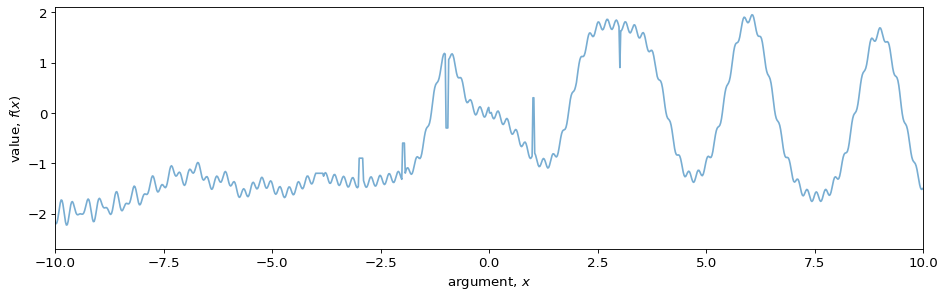

In [ ]:
draw_F()